# Working notebook to calculate E3SM-2-0 Energy Budget terms

# Notes

## imports

In [1]:
%%time
import matplotlib.pyplot as plt
import nc_time_axis
import numpy as np
import os
os.sys.path.insert(0, "/p/user_pub/xclim/persist/software/xsearch/")
import pdb
import time
import xarray as xr
import xcdat as xc
import xsearch as xs
from IPython.display import clear_output

CPU times: user 6.18 s, sys: 1.71 s, total: 7.89 s
Wall time: 10.6 s


## load von Schuckmann energy budget time history

In [2]:
%%time
dataPath = "~/p-work/Shared/obs_data/vonShuckmannetal23ESSD/"
realms = {
    "ocean": "GCOS_EHI_1960-2020_Earth_Heat_Inventory_Ocean_Heat_Content_data.nc", # 19 total_, ocean: 0-300m, 0-700m, 0-2000m, 700-2000m, below_2000m
    "continental": "GCOS_EHI_1960-2020_Continental_Heat_Content_data.nc", # 2 continental_, ground_
    "cryosphere": "GCOS_EHI_1960-2020_Cryosphere_Heat_Content_data.nc", # 6 cryosphere_, arctic_sea_ice_, antarctic_sea_ice_, antarctic_ice_sheet_, glaciers_, greenland_
    "atmospheric": "GCOS_EHI_1960-2020_Atmosphere_Heat_Content_data.nc", # 1 atmospheric
    "permafrost": "GCOS_EHI_1960-2020_Permafrost_Heat_Content_data.nc", # 1 permafrost
    "inland_water": "GCOS_EHI_1960-2020_Inland_Water_Heat_Content_data.nc", # 1 inland_water_
}
for count, realm in enumerate(realms.keys()):
    print(count, realm)
    file = realms[realm]
    print("file:", file)
    fullPath = os.path.join(dataPath, file)
    print("fullPath:", fullPath)
    dsKey = "_".join(["ds", realm])
    vars()[dsKey] = xc.open_dataset(fullPath)
    print(eval(dsKey).keys())
    #clear_output(wait=True)

0 ocean
file: GCOS_EHI_1960-2020_Earth_Heat_Inventory_Ocean_Heat_Content_data.nc
fullPath: ~/p-work/Shared/obs_data/vonShuckmannetal23ESSD/GCOS_EHI_1960-2020_Earth_Heat_Inventory_Ocean_Heat_Content_data.nc
KeysView(<xarray.Dataset>
Dimensions:                                     (time: 61)
Coordinates:
  * time                                        (time) object 1960-06-30 00:0...
Data variables: (12/19)
    total_heat_content                          (time) float32 ...
    total_heat_content_uncertainty              (time) float32 ...
    atmospheric_heat_content                    (time) float32 ...
    atmospheric_heat_content_uncertainty        (time) float32 ...
    atmospheric_heat_content_coverage_factor    (time) float32 ...
    continental_heat_content                    (time) float32 ...
    ...                                          ...
    ocean_heat_content_0-2000m                  (time) float32 ...
    ocean_heat_content_0-2000m_uncertainty      (time) float32 ...
  

In [4]:
# interrogate example dataset
ds_ocean
#ds_ocean["ocean_heat_content_0-300m"][-1].data.item()

<xarray.Dataset>
Dimensions:                                     (time: 61)
Coordinates:
  * time                                        (time) object 1960-06-30 00:0...
Data variables: (12/19)
    total_heat_content                          (time) float32 ...
    total_heat_content_uncertainty              (time) float32 ...
    atmospheric_heat_content                    (time) float32 ...
    atmospheric_heat_content_uncertainty        (time) float32 ...
    atmospheric_heat_content_coverage_factor    (time) float32 ...
    continental_heat_content                    (time) float32 ...
    ...                                          ...
    ocean_heat_content_0-2000m                  (time) float32 ...
    ocean_heat_content_0-2000m_uncertainty      (time) float32 ...
    ocean_heat_content_700-2000m                (time) float32 ...
    ocean_heat_content_700-2000m_uncertainty    (time) float32 ...
    ocean_heat_content_below_2000m              (time) float32 ...
    ocean_heat_content_below_2000m_uncertainty  (time) float32 ...
Attributes:
    title:    Data of energy inventory
    paper:    Heat stored in the Earth system 1960-2020: Where does the energ...
    comment:  Period : 1960-2020.

## quick von Schuckmann plots

ocean_heat_content_0-300m 132.94

ocean_heat_content_300-700m 75.30
ocean_heat_content_0-700m 208.24
ocean_heat_content_700-2000m 109.33
ocean_heat_content_below_2000m 26.19
continental_heat_content 23.92
cryosphere_heat_content 13.19
atmospheric_heat_content 05.56
permafrost_heat_content 02.11
inland_water_heat_content 00.20


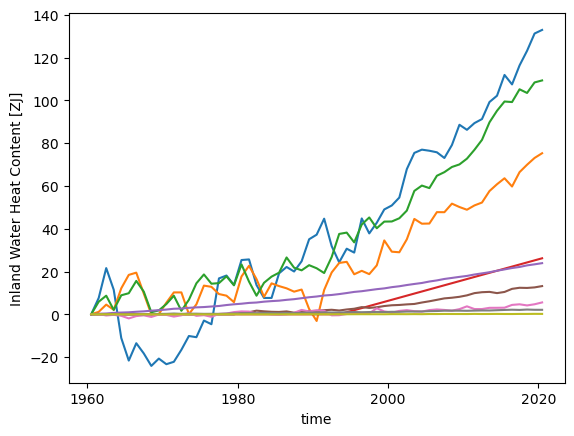

In [5]:
ds_ocean["ocean_heat_content_0-300m"].plot()
print("ocean_heat_content_0-300m", "{:05.2f}".format(ds_ocean["ocean_heat_content_0-300m"][-1].data.item()))
print()
# create 300-700 timeseries
ds3to700 = ds_ocean["ocean_heat_content_0-700m"]-ds_ocean["ocean_heat_content_0-300m"]
ds3to700.plot()
print("ocean_heat_content_300-700m", "{:05.2f}".format(ds3to700[-1].data.item()))
#ds_ocean["ocean_heat_content_0-700m"].plot()
print("ocean_heat_content_0-700m", "{:05.2f}".format(ds_ocean["ocean_heat_content_0-700m"][-1].data.item()))
ds_ocean["ocean_heat_content_700-2000m"].plot()
print("ocean_heat_content_700-2000m", "{:05.2f}".format(ds_ocean["ocean_heat_content_700-2000m"][-1].data.item()))
ds_ocean["ocean_heat_content_below_2000m"].plot()
print("ocean_heat_content_below_2000m", "{:05.2f}".format(ds_ocean["ocean_heat_content_below_2000m"][-1].data.item()))
for realm in realms.keys():
    if realm == "ocean":
        continue
    else:
        varName = "_".join([realm, "heat_content"])
        vars()["ds"] = eval("_".join(["ds", realm]))
        ds[varName].plot()
        print(varName, "{:05.2f}".format(ds[varName][-1].data.item()))

## plot von Schuckmann

perc: [34.198425   19.371103   28.124607    6.7374525   6.152478    3.3941183
  1.4298744   0.5416087   0.05033057]
sum(perc): 99.99999837949872
['0-300m ocean: 34.2%', '300-700m ocean: 19.4%', '700-2000m ocean: 28.1%', '2000m+ ocean: 6.7%', 'continental: 6.2%', 'cryosphere: 3.4%', 'atmosphere: 1.4%', 'permafrost: 0.5%', 'inland water: 0.1%']


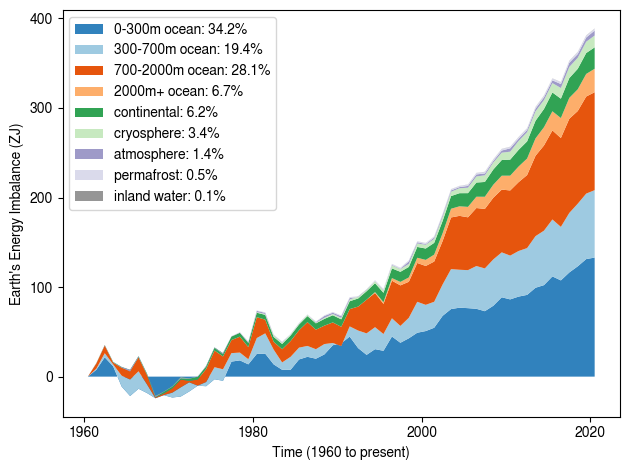

CPU times: user 254 ms, sys: 121 ms, total: 376 ms
Wall time: 173 ms


In [5]:
%%time
# plot up all components
ocean0to300 = ds_ocean["ocean_heat_content_0-300m"]
ocean300to700 = ds_ocean["ocean_heat_content_0-700m"]-ocean0to300
ocean700to2000 = ds_ocean["ocean_heat_content_700-2000m"]
ocean2000toBottom = ds_ocean["ocean_heat_content_below_2000m"]
continental = ds_continental["continental_heat_content"]
cryosphere = ds_cryosphere["cryosphere_heat_content"]
atmosphere = ds_atmospheric["atmospheric_heat_content"]
permafrost = ds_permafrost["permafrost_heat_content"]
inlandWater = ds_inland_water["inland_water_heat_content"]
ocean0to300.time.attrs["calendar"] = "standard"
x = ocean0to300.time.data # solves TypeError: 'int' object is not iterable
y = np.vstack([ocean0to300, ocean300to700, ocean700to2000, ocean2000toBottom, continental, cryosphere, atmosphere, permafrost, inlandWater])

# create % totals
y1 = np.sum(y[:, -1], axis=0)
perc = y[:, -1]
perc = (perc / y1) * 100
print("perc:", perc)
print("sum(perc):", sum(perc))

# create labels
f = "{:03.1f}%"
percLabels = []
strLabels = ["0-300m ocean", "300-700m ocean", "700-2000m ocean",
             "2000m+ ocean", "continental", "cryosphere",
             "atmosphere", "permafrost", "inland water"]
for count, lab in enumerate(strLabels):
    percLabels.append(': '.join([lab, f.format(perc[count])]))
print(percLabels)

# set up plot conditions
#fontName = "Microsoft Sans Serif"
fontName = "FreeSans"
# https://anaconda.org/conda-forge/mscorefonts/files
# https://stackoverflow.com/questions/42097053/matplotlib-cannot-find-basic-fonts
fontSize = 10
NUM_COLORS = 9
colList = []
cm = plt.get_cmap('tab20c')  # also tab 20b, tab20
# make ocean colours all blue - 26 leads to first 4 being blue dark-light
for i in range(NUM_COLORS):
    colList.append(cm(1.*i/NUM_COLORS))

# start plotting
labels = ["0-300m ocean", "300-700m ocean", "700-2000m ocean", "2000m+ ocean",
          "continental", "cryosphere", "atmosphere", "permafrost", "inland water"]
fig, ax = plt.subplots()
ax.stackplot(x, y, labels=percLabels, colors=colList)
#ax.legend(loc='upper left')
ax.legend(prop={"family": fontName, "size": fontSize}, loc="upper left")
plt.ylabel("Earth's Energy Imbalance (ZJ)", fontname=fontName, fontsize=fontSize)
plt.yticks(fontname=fontName, fontsize=fontSize)
plt.xlabel("Time (1960 to present)", fontname=fontName, fontsize=fontSize)
# below is not starting at 1960 on left
# https://stackoverflow.com/questions/29968654/format-of-datetime-in-pyplot-axis
#import matplotlib.dates as mdates; import matplotlib.ticker as plticker;
#loc = plticker.MultipleLocator(base=3652.5) # this locator puts ticks at regular intervals
#ax.xaxis.set_major_locator(loc)
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y')); fig.autofmt_xdate()
plt.xticks(fontname=fontName, fontsize=fontSize)
# fill canvas
fig.tight_layout()
plt.show()

### query available fonts

In [6]:
%%time
# query available fonts
from matplotlib import font_manager as fm
fns = fm.findSystemFonts(fontpaths=None, fontext='ttf'); fns.sort()
for count, fn in enumerate(fns):
    if "/" in fn:
        print(fn)

/home/durack1/mambaforge/envs/xcd061nctax/fonts/DejaVuSans.ttf
/home/durack1/mambaforge/envs/xcd061nctax/fonts/Inconsolata-Bold.ttf
/home/durack1/mambaforge/envs/xcd061nctax/fonts/Inconsolata-Regular.ttf
/home/durack1/mambaforge/envs/xcd061nctax/fonts/SourceCodePro-Black.ttf
/home/durack1/mambaforge/envs/xcd061nctax/fonts/SourceCodePro-BlackIt.ttf
/home/durack1/mambaforge/envs/xcd061nctax/fonts/SourceCodePro-Bold.ttf
/home/durack1/mambaforge/envs/xcd061nctax/fonts/SourceCodePro-BoldIt.ttf
/home/durack1/mambaforge/envs/xcd061nctax/fonts/SourceCodePro-ExtraLight.ttf
/home/durack1/mambaforge/envs/xcd061nctax/fonts/SourceCodePro-ExtraLightIt.ttf
/home/durack1/mambaforge/envs/xcd061nctax/fonts/SourceCodePro-It.ttf
/home/durack1/mambaforge/envs/xcd061nctax/fonts/SourceCodePro-Light.ttf
/home/durack1/mambaforge/envs/xcd061nctax/fonts/SourceCodePro-LightIt.ttf
/home/durack1/mambaforge/envs/xcd061nctax/fonts/SourceCodePro-Medium.ttf
/home/durack1/mambaforge/envs/xcd061nctax/fonts/SourceCodePro-

## plot volcanic forcings over time - forcing uncertainty is large

In [14]:
#Volcanic datasets
#CMIP3: Ammann 2003 https://www.ncei.noaa.gov/access/metadata/landing-page/bin/iso?id=noaa-forcing-5786 - done
#CMIP3: Sato 1993 1850-2012 https://data.giss.nasa.gov/modelforce/strataer/ - done
#CMIP5: Sato + Stenchikov 1998 (GFDL) - folded into update above?
#CMIP5: Gao et al 2008 https://doi.org/10.1029/2008JD010239 http://climate.envsci.rutgers.edu/IVI2/ - done
#CMIP6: Neely & Schmidt 2016 VolcanEESM https://catalogue.ceda.ac.uk/uuid/fab717b3cf06461490b186fe5242c45d - done
#CMIP6: Luo et al 2017 http://doi.org/10.22033/ESGF/input4MIPs.1681
# https://volcano.si.edu

# See what we have
forcePath = "/p/user_pub/climate_work/durack1/Shared/240209_CMIP6Plus_forcing"
inFile = "Neely2016-VolcanicForcing/v20240209/volcan-eesm_global_2015_so2-emissions-database_v1.0.nc"
inPath = os.path.join(forcePath, inFile)
ds = xc.open_dataset(inPath)
ds

2024-02-09 16:45:16,448 [WARNING]: dataset.py(open_dataset:128) >> "No time coordinates were found in this dataset to decode. If time coordinates were expected to exist, make sure they are detectable by setting the CF 'axis' or 'standard_name' attribute (e.g., ds['time'].attrs['axis'] = 'T' or ds['time'].attrs['standard_name'] = 'time'). Afterwards, try decoding again with `xcdat.decode_time`."
2024-02-09 16:45:16,448 [WARNING]: dataset.py(open_dataset:128) >> "No time coordinates were found in this dataset to decode. If time coordinates were expected to exist, make sure they are detectable by setting the CF 'axis' or 'standard_name' attribute (e.g., ds['time'].attrs['axis'] = 'T' or ds['time'].attrs['standard_name'] = 'time'). Afterwards, try decoding again with `xcdat.decode_time`."


<xarray.Dataset>
Dimensions:                   (Eruption_Number: 241)
Dimensions without coordinates: Eruption_Number
Data variables:
    Eruption                  (Eruption_Number) int8 ...
    VEI                       (Eruption_Number) int8 ...
    Year_of_Emission          (Eruption_Number) int16 ...
    Month_of_Emission         (Eruption_Number) int8 ...
    Day_of_Emission           (Eruption_Number) int8 ...
    Latitude                  (Eruption_Number) float32 ...
    Longitude                 (Eruption_Number) float32 ...
    Total_Emission            (Eruption_Number) float32 ...
    Maximum_Injection_Height  (Eruption_Number) float32 ...
    Minimum_Injection_Height  (Eruption_Number) float32 ...
Attributes:
    Creators:  Ryan R Neely III <R.Neely@leeds.ac.uk> and Anja Schmidt <A.Sch...
    DOI:       #####
    Citation:  #####
    Notes:     All emissions are in Tg of SO2. All injection heights are in k...

In [17]:
# make time index by getting bounds
start = "-".join([str(ds["Year_of_Emission"][0].data[()]), "{:02}".format(ds["Month_of_Emission"][0].data[()]), str(ds["Day_of_Emission"][0].data[()])])
end = "-".join([str(ds["Year_of_Emission"][-1].data[()]), "{:02}".format(ds["Month_of_Emission"][-1].data[()]), str(ds["Day_of_Emission"][-1].data[()])])
print(start, end)
time = xr.cftime_range(start=start, end=end, freq="D", normalize=True)

1853-04-22 2015-04-23


In [18]:
time

CFTimeIndex([1853-04-22 00:00:00, 1853-04-23 00:00:00, 1853-04-24 00:00:00,
             1853-04-25 00:00:00, 1853-04-26 00:00:00, 1853-04-27 00:00:00,
             1853-04-28 00:00:00, 1853-04-29 00:00:00, 1853-04-30 00:00:00,
             1853-05-01 00:00:00,
             ...
             2015-04-14 00:00:00, 2015-04-15 00:00:00, 2015-04-16 00:00:00,
             2015-04-17 00:00:00, 2015-04-18 00:00:00, 2015-04-19 00:00:00,
             2015-04-20 00:00:00, 2015-04-21 00:00:00, 2015-04-22 00:00:00,
             2015-04-23 00:00:00],
            dtype='object', length=59171, calendar='standard', freq='D')

## define target vertical coord and set preset values

In [8]:
cpocean = 3.996e3  # https://github.com/E3SM-Project/E3SM/blob/maint-2.0/share/util/shr_const_mod.F90#L50
rhozero = 1.026e3  # https://github.com/E3SM-Project/E3SM/blob/maint-2.0/share/util/shr_const_mod.F90#L44
oceanVol = 1.33511e+18
newdepth = np.array([5,10,20,30,40,50,75,100,125,150,200,300,500,700,1000,1500,1800,2000]).astype('f');
newdepth.shape

(18,)

## search E3SM-2-1 historical and piControl sims (pre-ESGF publication)

In [30]:
%%time
!ls /p/user_pub/e3sm/warehouse/CMIP6/CMIP/E3SM-Project/E3SM-2-1/historical/*/Omon/thetaoga/gr/v20240211/
#ds = xc.open_mfdataset("/p/user_pub/e3sm/warehouse/CMIP6/CMIP/E3SM-Project/E3SM-2-1/historical/r1i1p1f1/Omon/thetaoga/gr/v20240226/*")
#ds
#plt.plot(ds['thetaoga'])

/p/user_pub/e3sm/warehouse/CMIP6/CMIP/E3SM-Project/E3SM-2-1/historical/r1i1p1f1/Omon/thetaoga/gr/v20240211/:
thetaoga_Omon_E3SM-2-1_historical_r1i1p1f1_gr_185001-185912.nc
thetaoga_Omon_E3SM-2-1_historical_r1i1p1f1_gr_186001-186912.nc
thetaoga_Omon_E3SM-2-1_historical_r1i1p1f1_gr_187001-187912.nc
thetaoga_Omon_E3SM-2-1_historical_r1i1p1f1_gr_188001-188912.nc
thetaoga_Omon_E3SM-2-1_historical_r1i1p1f1_gr_189001-189912.nc
thetaoga_Omon_E3SM-2-1_historical_r1i1p1f1_gr_190001-190912.nc
thetaoga_Omon_E3SM-2-1_historical_r1i1p1f1_gr_191001-191912.nc
thetaoga_Omon_E3SM-2-1_historical_r1i1p1f1_gr_192001-192912.nc
thetaoga_Omon_E3SM-2-1_historical_r1i1p1f1_gr_193001-193912.nc
thetaoga_Omon_E3SM-2-1_historical_r1i1p1f1_gr_194001-194912.nc
thetaoga_Omon_E3SM-2-1_historical_r1i1p1f1_gr_195001-195912.nc
thetaoga_Omon_E3SM-2-1_historical_r1i1p1f1_gr_196001-196912.nc
thetaoga_Omon_E3SM-2-1_historical_r1i1p1f1_gr_197001-197912.nc
thetaoga_Omon_E3SM-2-1_historical_r1i1p1f1_gr_198001-198912.nc
thetaoga_

CPU times: user 612 ms, sys: 75.7 ms, total: 687 ms
Wall time: 680 ms


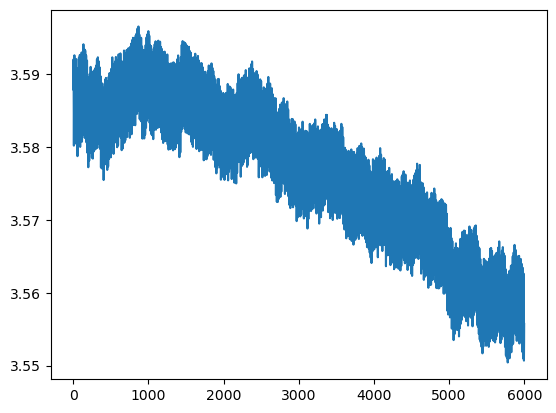

In [22]:
%%time
ds = xc.open_mfdataset("/p/user_pub/e3sm/warehouse/CMIP6/CMIP/E3SM-Project/E3SM-2-1/piControl/r1i1p1f1/Omon/thetaoga/gr/v20240226/*")
ds
plt.plot(ds['thetaoga'])

## search E3SM-2-0 historical and piControl sims

In [9]:
%%time
dpaths = xs.findPaths('historical', 'thetaoga', 'mon', realm='ocean', cmipTable='Omon')
#for count, sim in enumerate(dpaths):
#    print("{:03d}".format(count), sim)
#print(dpaths.keys())
simsH = xs.getValuesForFacet(dpaths, 'model', 'E3SM-2-0')  # also E3SM-1-0 (E3SM-Project (1-5), UCSB, E3SM-Project), E3SM-1-1 + ECA, E3SM-2-0-NARRM
# get piControl
dpaths = xs.findPaths('piControl', 'thetaoga', 'mon', realm='ocean', cmipTable='Omon')
simsP = xs.getValuesForFacet(dpaths, 'model', 'E3SM-2-0')
#simsH
#simsP

CPU times: user 19.6 ms, sys: 3.87 ms, total: 23.4 ms
Wall time: 22.3 ms


## check E3SM-2-0 global curves

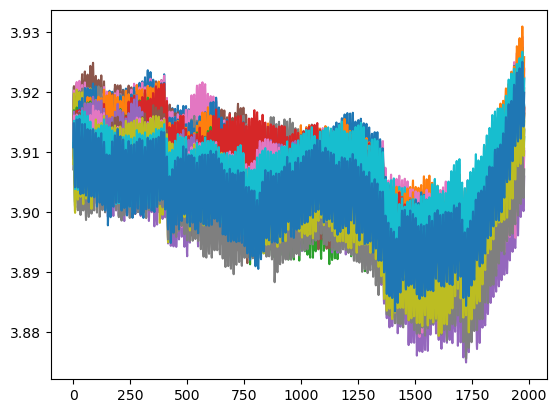

CPU times: user 4.88 s, sys: 979 ms, total: 5.86 s
Wall time: 5.71 s


['/p/user_pub/work/CMIP6/CMIP/E3SM-Project/E3SM-2-0/historical/r1i1p1f1/Omon/thetaoga/gr/v20221112/',
 '/p/user_pub/work/CMIP6/CMIP/E3SM-Project/E3SM-2-0/historical/r2i1p1f1/Omon/thetaoga/gr/v20221113/',
 '/p/user_pub/work/CMIP6/CMIP/E3SM-Project/E3SM-2-0/historical/r3i1p1f1/Omon/thetaoga/gr/v20221113/',
 '/p/user_pub/work/CMIP6/CMIP/E3SM-Project/E3SM-2-0/historical/r4i1p1f1/Omon/thetaoga/gr/v20221114/',
 '/p/user_pub/work/CMIP6/CMIP/E3SM-Project/E3SM-2-0/historical/r5i1p1f1/Omon/thetaoga/gr/v20221115/',
 '/p/user_pub/work/CMIP6/CMIP/E3SM-Project/E3SM-2-0/historical/r6i1p1f1/Omon/thetaoga/gr/v20230805/',
 '/p/user_pub/work/CMIP6/CMIP/E3SM-Project/E3SM-2-0/historical/r7i1p1f1/Omon/thetaoga/gr/v20230811/',
 '/p/user_pub/work/CMIP6/CMIP/E3SM-Project/E3SM-2-0/historical/r8i1p1f1/Omon/thetaoga/gr/v20230818/',
 '/p/user_pub/work/CMIP6/CMIP/E3SM-Project/E3SM-2-0/historical/r9i1p1f1/Omon/thetaoga/gr/v20230827/',
 '/p/user_pub/work/CMIP6/CMIP/E3SM-Project/E3SM-2-0/historical/r10i1p1f1/Omon/thet

In [10]:
%%time
ds = xc.open_mfdataset(simsH[0])
plt.plot(ds['thetaoga'])
yrange = [3.7, 3.94]
#plt.ylim(yrange)
for sim in simsH[1:]:
    ds = xc.open_mfdataset(sim)
    plt.plot(ds['thetaoga'])
plt.show()
simsH

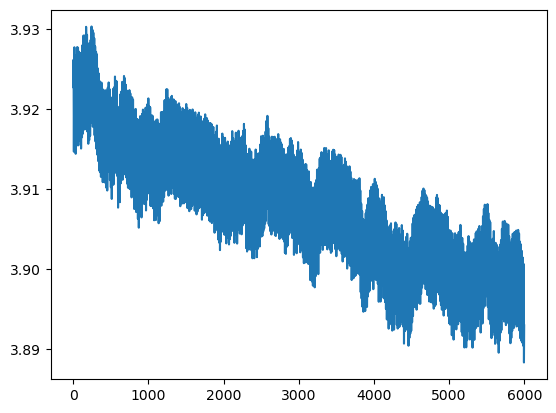

['/p/user_pub/work/CMIP6/CMIP/E3SM-Project/E3SM-2-0/piControl/r1i1p1f1/Omon/thetaoga/gr/v20221116/']

In [11]:
ds = xc.open_mfdataset(simsP[0])
plt.plot(ds['thetaoga'])
plt.show()
simsP

## search GFDL-CM4 historical and piControl sims

In [12]:
%%time
dpaths = xs.findPaths('historical', 'thetaoga', 'mon', realm='ocean', cmipTable='Omon')
simsH = xs.getValuesForFacet(dpaths, 'model', 'GFDL-CM4')
dpaths = xs.findPaths('piControl', 'thetaoga', 'mon', realm='ocean', cmipTable='Omon')
simsP = xs.getValuesForFacet(dpaths, 'model', 'GFDL-CM4')

CPU times: user 22.8 ms, sys: 708 µs, total: 23.5 ms
Wall time: 22.4 ms


## check GFDL-CM4 global curves

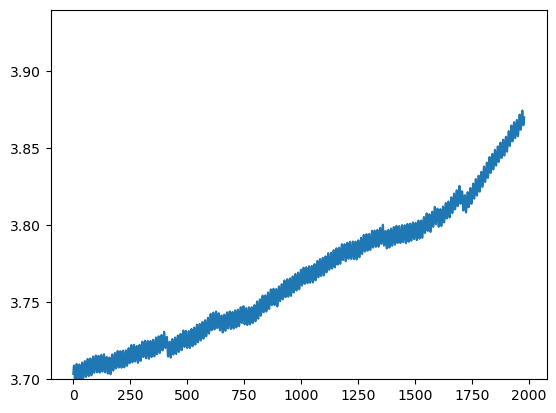

CPU times: user 1.25 s, sys: 251 ms, total: 1.5 s
Wall time: 1.15 s


['/p/css03/esgf_publish/CMIP6/CMIP/NOAA-GFDL/GFDL-CM4/historical/r1i1p1f1/Omon/thetaoga/gn/v20180701/']

In [13]:
%%time
ds = xc.open_mfdataset(simsH[0])
plt.plot(ds['thetaoga'])
plt.ylim(yrange)
for sim in simsH[1:]:
    ds = xc.open_mfdataset(sim)
    plt.plot(ds['thetaoga'])
plt.show()
simsH

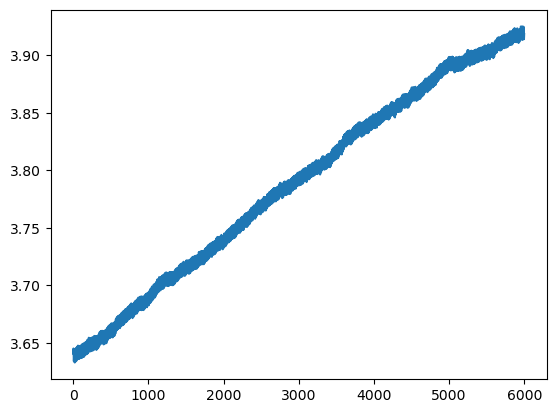

['/p/css03/esgf_publish/CMIP6/CMIP/NOAA-GFDL/GFDL-CM4/piControl/r1i1p1f1/Omon/thetaoga/gn/v20180701/']

In [14]:
ds = xc.open_mfdataset(simsP[0])
plt.plot(ds['thetaoga'])
plt.show()
simsP

## search ACCESS-CM2 historical and piControl sims

In [15]:
%%time
dpaths = xs.findPaths('historical', 'thetaoga', 'mon', realm='ocean', cmipTable='Omon', mip_era='CMIP6')
simsH = xs.getValuesForFacet(dpaths, 'model', 'ACCESS-CM2')
dpaths = xs.findPaths('piControl', 'thetaoga', 'mon', realm='ocean', cmipTable='Omon', mip_era='CMIP6')
simsP = xs.getValuesForFacet(dpaths, 'model', 'ACCESS-CM2')

CPU times: user 23.3 ms, sys: 1.82 ms, total: 25.1 ms
Wall time: 24 ms


## check ACCESS-CM2 global curves

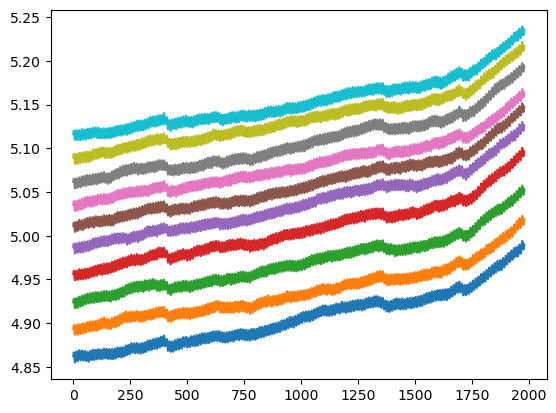

CPU times: user 447 ms, sys: 174 ms, total: 621 ms
Wall time: 482 ms


['/p/css03/esgf_publish/CMIP6/CMIP/CSIRO-ARCCSS/ACCESS-CM2/historical/r1i1p1f1/Omon/thetaoga/gn/v20200311/',
 '/p/css03/esgf_publish/CMIP6/CMIP/CSIRO-ARCCSS/ACCESS-CM2/historical/r2i1p1f1/Omon/thetaoga/gn/v20200311/',
 '/p/css03/esgf_publish/CMIP6/CMIP/CSIRO-ARCCSS/ACCESS-CM2/historical/r3i1p1f1/Omon/thetaoga/gn/v20200311/',
 '/p/css03/esgf_publish/CMIP6/CMIP/CSIRO-ARCCSS/ACCESS-CM2/historical/r4i1p1f1/Omon/thetaoga/gn/v20210607/',
 '/p/css03/esgf_publish/CMIP6/CMIP/CSIRO-ARCCSS/ACCESS-CM2/historical/r5i1p1f1/Omon/thetaoga/gn/v20210607/',
 '/p/css03/esgf_publish/CMIP6/CMIP/CSIRO-ARCCSS/ACCESS-CM2/historical/r6i1p1f1/Omon/thetaoga/gn/v20220819/',
 '/p/css03/esgf_publish/CMIP6/CMIP/CSIRO-ARCCSS/ACCESS-CM2/historical/r7i1p1f1/Omon/thetaoga/gn/v20220819/',
 '/p/css03/esgf_publish/CMIP6/CMIP/CSIRO-ARCCSS/ACCESS-CM2/historical/r8i1p1f1/Omon/thetaoga/gn/v20220819/',
 '/p/css03/esgf_publish/CMIP6/CMIP/CSIRO-ARCCSS/ACCESS-CM2/historical/r9i1p1f1/Omon/thetaoga/gn/v20220819/',
 '/p/css03/esgf_pub

In [16]:
%%time
ds = xc.open_mfdataset(simsH[0])
plt.plot(ds['thetaoga'])
#plt.ylim(yrange)
for sim in simsH[1:]:
    ds = xc.open_mfdataset(sim)
    plt.plot(ds['thetaoga'])
plt.show()
simsH

/home/durack1/mambaforge/envs/xcd061nctax/lib/python3.11/site-packages/xarray/coding/times.py:167: SerializationWarning: Ambiguous reference date string: 950-01-01. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0950-01-01). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  warnings.warn(warning_msg, SerializationWarning)


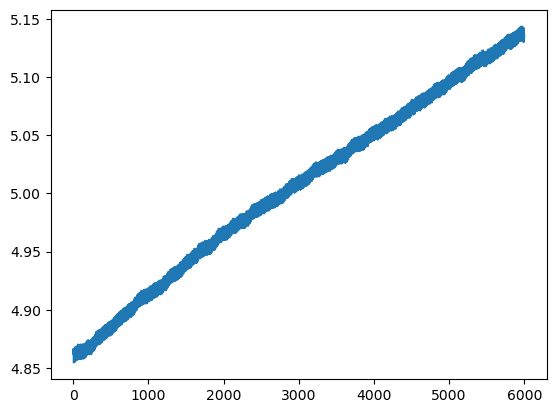

['/p/css03/esgf_publish/CMIP6/CMIP/CSIRO-ARCCSS/ACCESS-CM2/piControl/r1i1p1f1/Omon/thetaoga/gn/v20200311/']

In [17]:
ds = xc.open_mfdataset(simsP[0])
plt.plot(ds['thetaoga'])
plt.show()
simsP

# search MPI* historical and piControl sims

In [2]:
%%time
dpaths = xs.findPaths('historical', 'thetaoga', 'mon', realm='ocean', cmipTable='Omon', mip_era='CMIP6')
simsH = xs.getValuesForFacet(dpaths, 'model', 'MPI*')
dpaths = xs.findPaths('piControl', 'thetaoga', 'mon', realm='ocean', cmipTable='Omon', mip_era='CMIP6')
simsP = xs.getValuesForFacet(dpaths, 'model', 'MPI*')

CPU times: user 24.8 ms, sys: 1.3 ms, total: 26.1 ms
Wall time: 197 ms


In [3]:
simsH

['/p/css03/esgf_publish/CMIP6/CMIP/HAMMOZ-Consortium/MPI-ESM-1-2-HAM/historical/r1i1p1f1/Omon/thetaoga/gn/v20190627/',
 '/p/css03/esgf_publish/CMIP6/CMIP/HAMMOZ-Consortium/MPI-ESM-1-2-HAM/historical/r3i1p1f1/Omon/thetaoga/gn/v20191218/',
 '/p/css03/esgf_publish/CMIP6/CMIP/MPI-M/MPI-ESM1-2-HR/historical/r1i1p1f1/Omon/thetaoga/gn/v20190710/',
 '/p/css03/esgf_publish/CMIP6/CMIP/MPI-M/MPI-ESM1-2-HR/historical/r2i1p1f1/Omon/thetaoga/gn/v20190710/',
 '/p/css03/esgf_publish/CMIP6/CMIP/MPI-M/MPI-ESM1-2-HR/historical/r3i1p1f1/Omon/thetaoga/gn/v20190710/',
 '/p/css03/esgf_publish/CMIP6/CMIP/MPI-M/MPI-ESM1-2-HR/historical/r4i1p1f1/Omon/thetaoga/gn/v20190710/',
 '/p/css03/esgf_publish/CMIP6/CMIP/MPI-M/MPI-ESM1-2-HR/historical/r5i1p1f1/Omon/thetaoga/gn/v20190710/',
 '/p/css03/esgf_publish/CMIP6/CMIP/MPI-M/MPI-ESM1-2-HR/historical/r6i1p1f1/Omon/thetaoga/gn/v20190710/',
 '/p/css03/esgf_publish/CMIP6/CMIP/MPI-M/MPI-ESM1-2-HR/historical/r7i1p1f1/Omon/thetaoga/gn/v20190710/',
 '/p/css03/esgf_publish/CMI

In [4]:
simsP

['/p/css03/esgf_publish/CMIP6/CMIP/HAMMOZ-Consortium/MPI-ESM-1-2-HAM/piControl/r1i1p1f1/Omon/thetaoga/gn/v20200120/',
 '/p/css03/esgf_publish/CMIP6/CMIP/MPI-M/MPI-ESM1-2-HR/piControl/r1i1p1f1/Omon/thetaoga/gn/v20190710/',
 '/p/css03/esgf_publish/CMIP6/CMIP/MPI-M/MPI-ESM1-2-LR/piControl/r1i1p1f1/Omon/thetaoga/gn/v20190710/',
 '/p/css03/esgf_publish/CMIP6/CMIP/MPI-M/MPI-ESM1-2-LR/piControl/r2i1p1f1/Omon/thetaoga/gn/v20190815/']

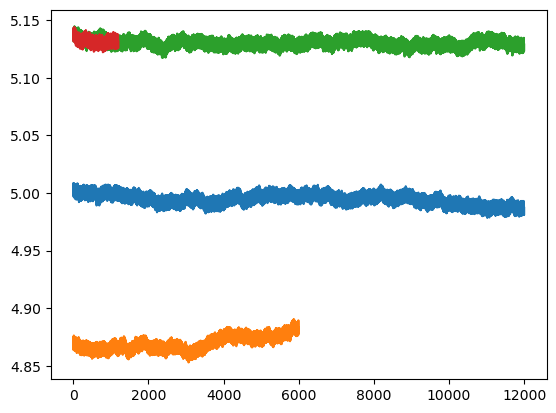

CPU times: user 2.77 s, sys: 558 ms, total: 3.32 s
Wall time: 6.4 s


['/p/css03/esgf_publish/CMIP6/CMIP/HAMMOZ-Consortium/MPI-ESM-1-2-HAM/piControl/r1i1p1f1/Omon/thetaoga/gn/v20200120/',
 '/p/css03/esgf_publish/CMIP6/CMIP/MPI-M/MPI-ESM1-2-HR/piControl/r1i1p1f1/Omon/thetaoga/gn/v20190710/',
 '/p/css03/esgf_publish/CMIP6/CMIP/MPI-M/MPI-ESM1-2-LR/piControl/r1i1p1f1/Omon/thetaoga/gn/v20190710/',
 '/p/css03/esgf_publish/CMIP6/CMIP/MPI-M/MPI-ESM1-2-LR/piControl/r2i1p1f1/Omon/thetaoga/gn/v20190815/']

In [6]:
%%time
ds = xc.open_mfdataset(simsP[0])
plt.plot(ds['thetaoga'])
#plt.ylim(yrange)
for sim in simsP[1:]:
    ds = xc.open_mfdataset(sim)
    plt.plot(ds['thetaoga'])
plt.show()
simsP

# search E3SM-1-0, E3SM-1-1, E3SM-1-1-ECA, E3SM-2-0-NARRM and E3SM-2-1